In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

### PROBLEM 1 - FTSC solution of the wave equation

function to calculate the velocities 'psi' given the positions 'x'

In [3]:
def velocity(x, d):               # x = phi_instant_value (position)

    frac = x*(L-x)/(L**2)
    frac_exp = -(x-d)**2/(2*(sigma**2))
    
    expn = exp(frac_exp)

    return C*frac*expn

**Alternative a)** make plots of velocities of each 'd' value

In [5]:
L = 1.0
d = array([0.1, 0.3, 0.6, 0.9], float)
C = 0.001
sigma = 0.3
h = 1e-6

N = 100
v = 100
a = L/N

x = linspace(0, L, N)

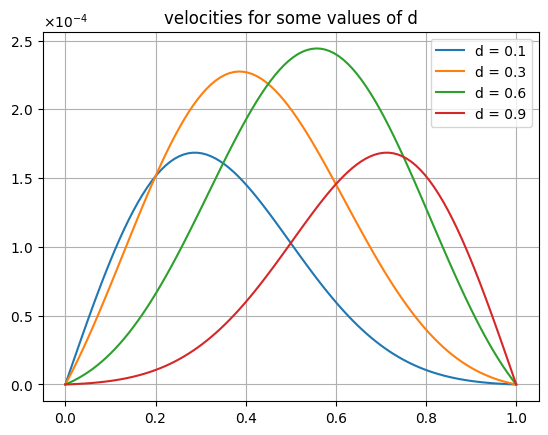

In [6]:
list_all_psis = []

for d_value in d:
    
    psi = zeros(N, float)
    
    for i in range(N):
        psi[i] = velocity(x[i], d_value)

    psiprime = copy(psi)
    list_all_psis.append(psiprime)

for index, curve in enumerate(list_all_psis):
    plt.plot(x, curve, label=f'd = {d[index]}')
    plt.title('velocities for some values of d')
    
    plt.gca().yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
    plt.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))

plt.legend()
plt.grid()
plt.show()

**Alternative b)** calculate the phi in function of time, to see when our approximation fail

In [104]:
L = 1.0
d_b = 0.3
C = 0.001
sigma = 0.3
h = 1e-6

N = 100
v = 100
a = L/N

# ts = array([0.01, 0.11, 0.13, 0.2], float)
ts = array([0.050, 0.110, 0.130, 0.150], float)

x = linspace(0, L, N)

In [106]:
phi = zeros(N, float)
phiprime = zeros(N, float)

psi = zeros(N, float)

for i in range(1, N-1):
    psi[i] = velocity(x[i], d_b)
    
psiprime = copy(psi)

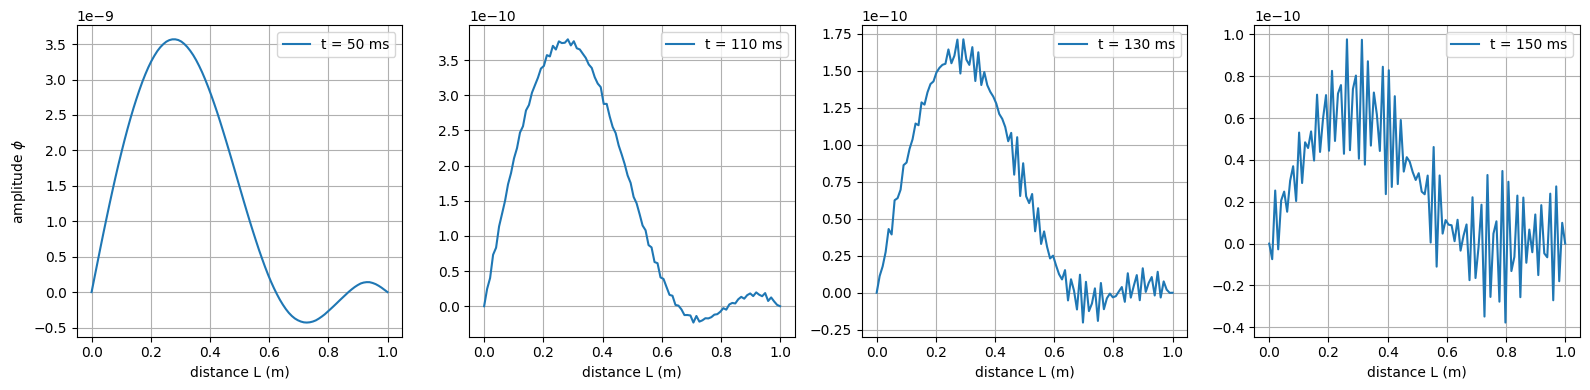

In [108]:
t, epsilon = 0.0, 1e-6
tend = max(ts) + epsilon

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

while t < tend:
    for i in range(1, N-1):

        phiprime[i] = phi[i] + h*psi[i]
        psiprime[i] = psi[i] + (phi[i-1] + phi[i+1] - 2*phi[i])*h*(v**2/a**2)       # [i-1] and [i+1] because our phi
                                                                                    # has space 'a' between 2 values
    t += h
    phi = phiprime
    psi = psiprime

    for index, time in enumerate(ts):
        if abs(t-time)<epsilon: 

            axs[index].cla()
            axs[index].plot(x, phi ,c='tab:blue', label=f't = {1000*time:.0f} ms')
            
            axs[0].set_ylabel(r'amplitude $\phi$')
            axs[index].set_xlabel('distance L (m)')
            axs[index].grid(True)

            axs[index].legend()
            
plt.tight_layout()
plt.show()

### PROBLEM 2 - The relaxation method for ordinary differential equations